### Descargar imágenes

In [1]:
# import os
# if os.path.exists('Imagenes'):   
#     print ('La carpeta ya existe')
# else:
#     os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
#     os.system('unzip Imagenes.zip?dl=1')
#     os.system('rm -r Imagenes.zip?dl=1')
#     print('ImAgenes descargadas')

ImAgenes descargadas


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img0=cv2.imread('linfo1.png')
img=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)[150:500,200:800]

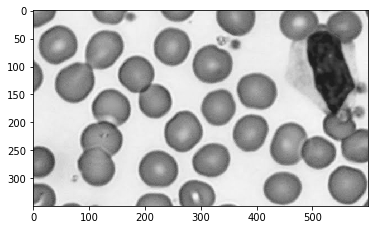

In [4]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [5]:
def grafica(ima1, ima2):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(ima1, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1,2,2)
    plt.imshow(ima2, cmap='gray', vmin=0, vmax=255)
    plt.show()

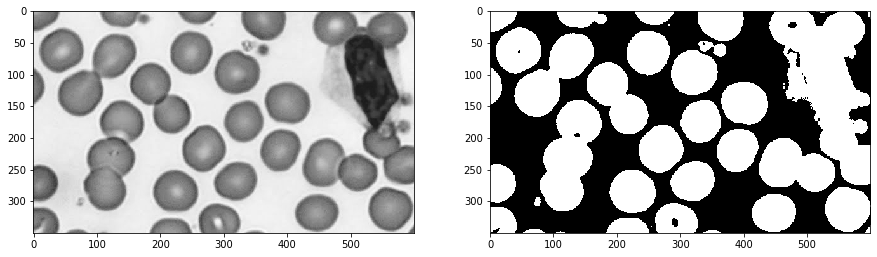

In [6]:
Umb,imgB=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
grafica(img, imgB)

### Transformaciones morfológicas
Las transformaciones morfológicas son algunas operaciones simples basadas en la forma de la imagen, que normalmente se aplican a imágenes binarias. La transformación morfológica, como su nombre lo dice, transforma o modifica la forma de la imagen basandose en un elemento de análisis o kernel. A continuación se presentan las tranformaciones morfológicas más comunes.

### Erosión 
La idea básica de la erosión es similar al concepto de erosión del suelo, erosiona los límites del objeto de primer plano (siempre trate de mantener el primer plano en blanco). El kernel se desliza a través de la imagen (como en la convolución 2D). Un píxel en la imagen original (1 o 0) se considerará 1 solo si todos los píxeles debajo del kernel son 1, de lo contrario se erosiona, es decir, se cambia su valor a cero. Entonces, lo que sucede es que todos los píxeles cerca del límite se descartarán dependiendo del tamaño del kernel. Por lo tanto, el grosor o el tamaño del objeto en primer plano disminuye o simplemente la región blanca disminuye en la imagen. Es útil para eliminar pequeños ruidos blancos.

```
cv2.erode(imgB,kernel,iterations = 1)
    imgB       : Imagen de preferencia binaria.
    kernel     : Arreglo de unos con el tamaño de la transformación deseada.
    iterations : Número de veces que se desea repetir este proceso.
```

In [7]:
kernel = np.ones((13,13),np.uint8)

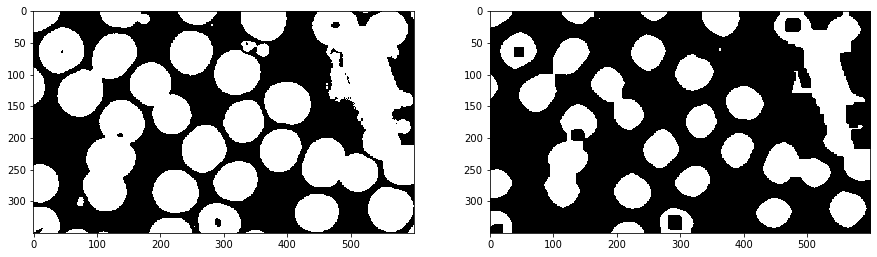

In [8]:
imaEro = cv2.erode(imgB,kernel,iterations = 1)
grafica(imgB, imaEro)

### Dilatación
Es justo lo contrario al proceso de la erosión. Aquí, un elemento de píxel es ‘1’ si al menos un píxel debajo del núcleo es ‘1’. Por lo tanto, esto hace que aumente la región blanca en la imagen o el tamaño del objeto en primer plano. En algunos casos, la dilatación es utilizada para eliminar el ruido negro al interior de nuestro elemento de interés. 

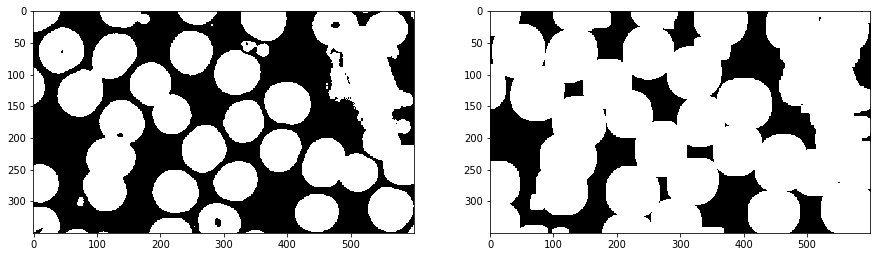

In [9]:
imaDil = cv2.dilate(imgB,kernel,iterations = 1)
grafica(imgB, imaDil)

### Aperuta
En algunos caso cuando se elimina el ruido blanco mediante la erosión, nuestros elementos de interés pierden parte del tamaño y por lo tanto, parte de información de intéres. En este caso, se puede proceder con una dilatación ulterior con el fin de recuperar el tamaño original. Este proceso es conocido como apertura. En opencv podemos implementar la apertura con los dos comandos anteriores o mediante la siguiente función:

```
imaOp2=cv2.morphologyEx(imgB, Trans, kernel, iterations = 1)
    imgB       : Imagen de preferencia binaria.
    Transf     : Tipo de transformación morfológica
            cv2.MORPH_OPEN
            cv2.MORPH_CLOSE
            cv2.MORPH_GRADIENT
            cv2.MORPH_TOPHAT
            cv2.MORPH_BLACKHAT
    kernel     : Arreglo de unos con el tamaño de la transformación deseada.
    iterations : Número de veces que se desea repetir este proceso.
```

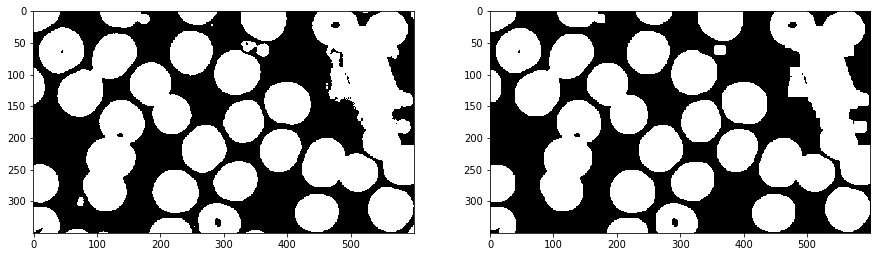

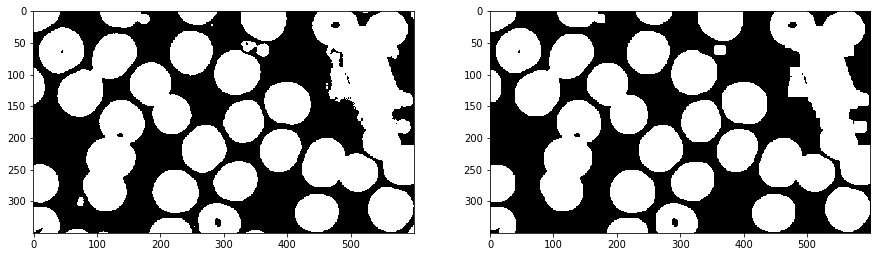

In [10]:
imaEro = cv2.erode(imgB,kernel,iterations = 1)
imaOp1 = cv2.dilate(imaEro,kernel,iterations = 1)
imaOp2=cv2.morphologyEx(imgB, cv2.MORPH_OPEN, kernel, iterations = 1)
grafica(imgB, imaOp1)
grafica(imgB, imaOp2)

### Cierre
El cierre es al revés de Apertura, Dilatación seguida de Erosión . Es útil para cerrar pequeños orificios dentro de los objetos en primer plano o pequeños puntos negros en el objeto.

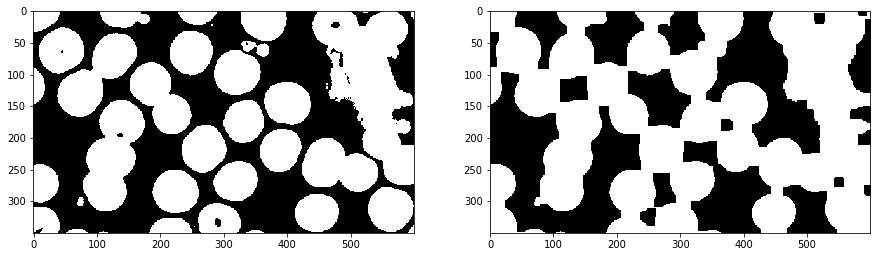

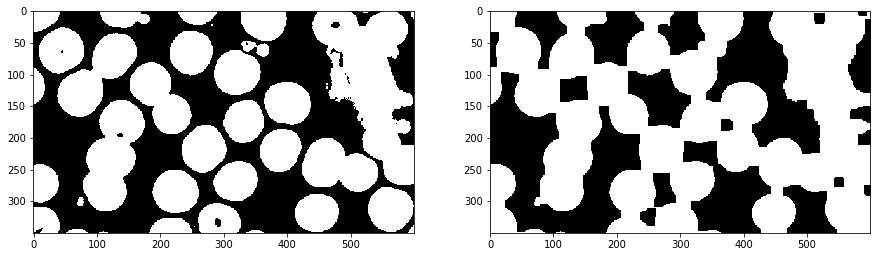

In [11]:
imaEro = cv2.dilate(imgB,kernel,iterations = 1)
imaCl1 = cv2.erode(imaEro,kernel,iterations = 1)
imaCl2=cv2.morphologyEx(imgB, cv2.MORPH_CLOSE, kernel, iterations = 1)

grafica(imgB, imaCl1)
grafica(imgB, imaCl2)

### Gradiente
Es la diferencia entre dilatación y erosión de una imagen.
El resultado se verá como el contorno del objeto.

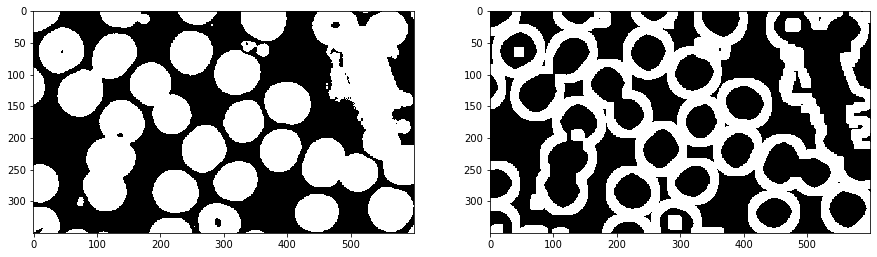

In [12]:
imaT=cv2.morphologyEx(imgB, cv2.MORPH_GRADIENT, kernel, iterations = 1)
grafica(imgB, imaT)

### Sombrero de copa
Es la diferencia entre la imagen de entrada y la apertura de la imagen.

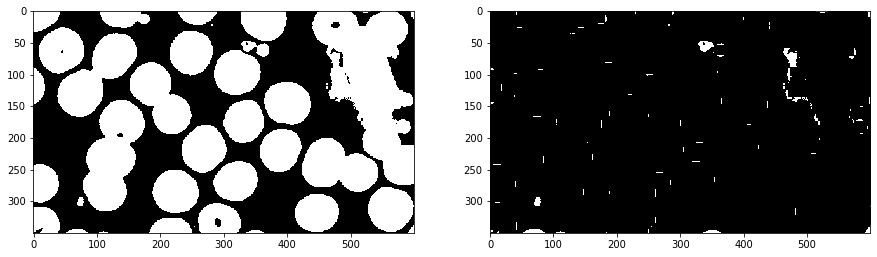

In [13]:
imaT=cv2.morphologyEx(imgB, cv2.MORPH_TOPHAT, kernel, iterations = 1)
grafica(imgB, imaT)

### Sombrero negro
Es la diferencia entre el cierre de la imagen de entrada y la imagen de entrada.

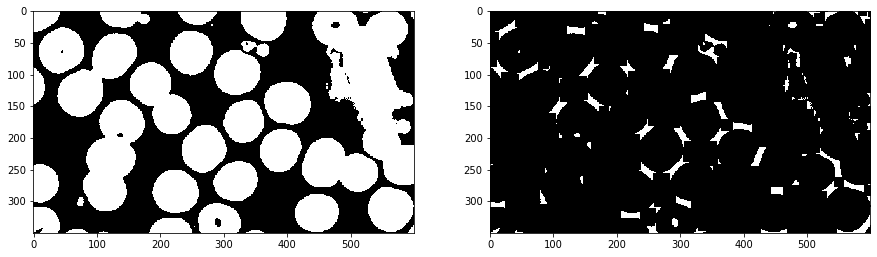

In [14]:
imaT=cv2.morphologyEx(imgB, cv2.MORPH_BLACKHAT, kernel, iterations = 1)
grafica(imgB, imaT)

### Diferentes formas del kernel
Como ya sabemos, el kernel en donde están los píxele bajo 'análisis', por lo tanto kernel diferentes tendrían resultados diferentes. A continuación se utilizan kernels de diferente forma para ver su comporetamiento.

In [15]:
kernel2=np.ones((3,25),np.uint8)
print (kernel2)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


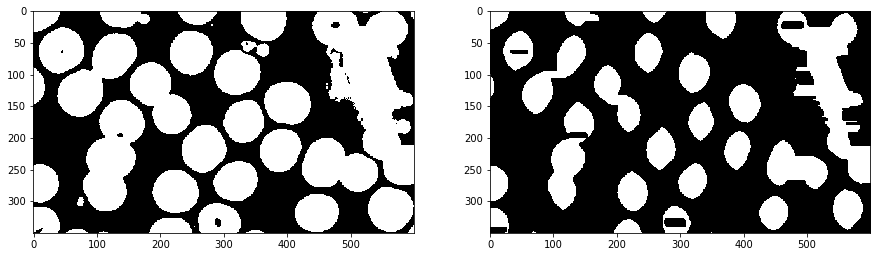

In [16]:
imaEro = cv2.erode(imgB,kernel2,iterations = 1)
grafica(imgB, imaEro)

In [17]:
kernel2=np.ones((25,3),np.uint8)
print (kernel2)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


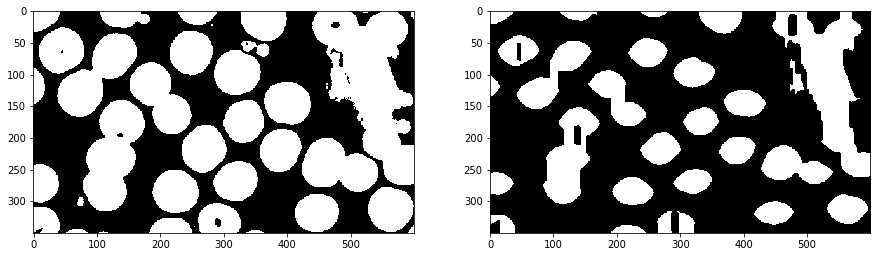

In [18]:
imaEro = cv2.erode(imgB,kernel2,iterations = 1)
grafica(imgB, imaEro)

OpenCV me permite obtener kernel un poco mas complejos con el siguiente comando:

```
cv2.getStructuringElement(Estruc,Tamaño)
    Estruc   :Estructura del kernel
            cv2.MORPH_RECT
            cv2.MORPH_ELLIPSE
            cv2.MORPH_CROSS
    Tamaño   :Tamaño del kernel (rows,cols)
```

In [31]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
e = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
l = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

print (element,"\n\n",e,"\n\n",l)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]] 

 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]] 

 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


### Esqueletización
La esqueletización reduce los objetos binarios a representaciones de 1 píxel de ancho. Esto puede ser útil para la extracción de características y/o representar la topología de un objeto.
La esqueletización funciona haciendo pases sucesivos de la imagen. En cada pasada, los píxeles del borde se identifican y eliminan con la condición de que no rompan la conectividad del objeto correspondiente.

In [20]:
skel = np.zeros(imgB.shape,np.uint8)

In [21]:
element

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [22]:
imgS=imgB.copy()
while(True):
    eroded = cv2.erode(imgS,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(imgS,temp)
    skel = cv2.bitwise_or(skel,temp)
    imgS = eroded.copy()

    zerosN = cv2.countNonZero(imgS)
    if zerosN==0:
        break

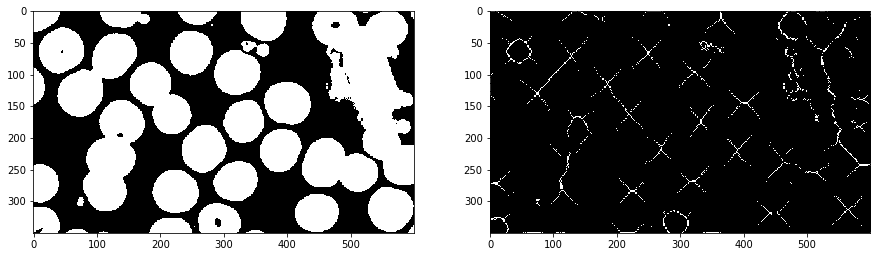

In [23]:
grafica(imgB, skel)

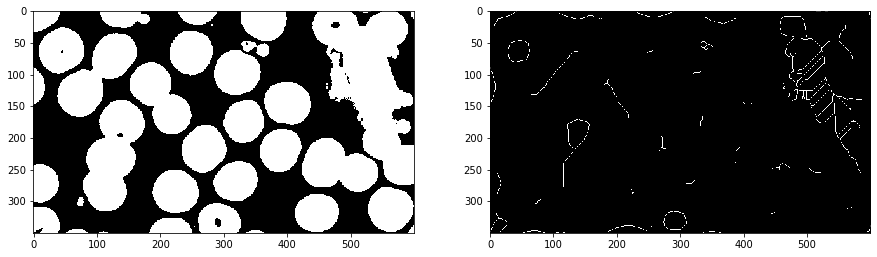

In [24]:
from skimage.morphology import skeletonize
skeleton = skeletonize(imgB/255)
grafica(imgB, skeleton*255)

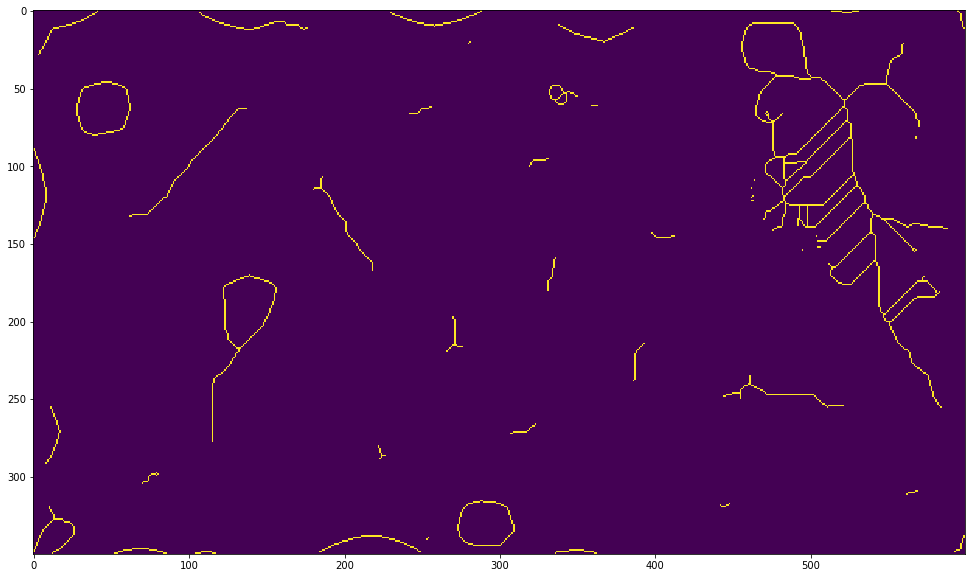

In [25]:
plt.figure(figsize=(30,10))
plt.imshow(skeleton)